In [1]:
import torch
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools
%matplotlib inline

%load_ext autoreload
%autoreload 2
import random
import pdb
# from multiprocessing import Process, Manager
# from multiprocessing import set_start_method

In [2]:
import sys
sys.path.insert(0, '/home/nkotelevskii/github/corrected_l2hmc/l2hmc_pytorch/l2hmc/utils/')

In [3]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
# device = "cpu"
device

'cuda:0'

In [4]:
from func_utils_pt import acl_spectrum, ESS

In [5]:
from distributions_pt import Gaussian
from layers_pt import Net
from dynamics_pt import Dynamics
from sampler_pt import propose
from notebook_utils_pt import get_hmc_samples

In [6]:
network = Net

In [7]:
x_dim = 2
mu = np.zeros(2,)
mu = torch.tensor(mu, dtype=torch.float32).to(device)
cov = np.array([[50.05, -49.95], [-49.95, 50.05]])
cov = torch.tensor(cov, dtype=torch.float32).to(device)

distribution = Gaussian(mu, cov, device=device)
dynamics = Dynamics(x_dim, distribution.get_energy_function(), T=10, eps=0.1, net_factory=network, device=device)

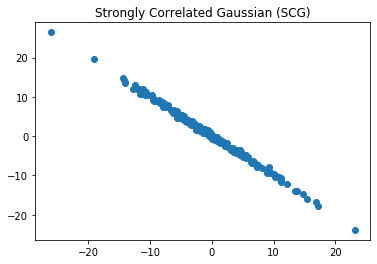

In [8]:
S = distribution.get_samples(200)
plt.title('Strongly Correlated Gaussian (SCG)')
plt.scatter(S[:, 0], S[:, 1])
plt.show()

In [9]:
n_steps = 5000
n_samples = 200
scale = torch.tensor(0.1, device=device)

use_barker = False

In [10]:
optim = Adam(dynamics.parameters())

In [11]:
# [p for p in dynamics.parameters()] 

In [12]:
dynamics.alpha

Parameter containing:
tensor(0.1000, device='cuda:0', requires_grad=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

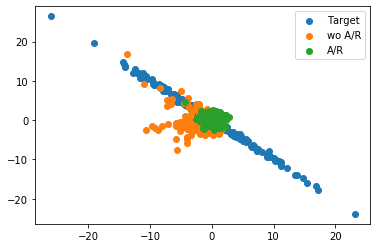

  0%|          | 1/5000 [00:00<34:13,  2.43it/s]

Step: 0 / 5000, Loss: 1.18e+03, Acceptance sample: 0.09, LR: 0.00100


  1%|          | 50/5000 [00:16<27:11,  3.03it/s]

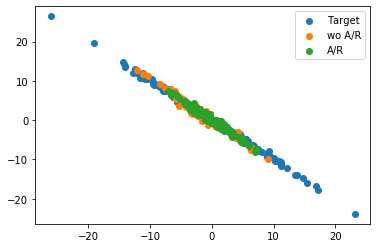

  2%|▏         | 100/5000 [00:33<26:50,  3.04it/s]

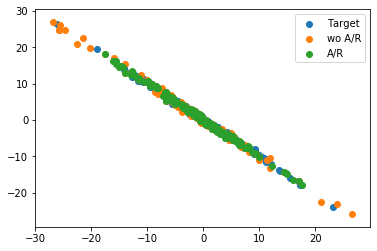

  2%|▏         | 101/5000 [00:33<29:33,  2.76it/s]

Step: 100 / 5000, Loss: -5.20e+01, Acceptance sample: 0.54, LR: 0.00100


  3%|▎         | 150/5000 [00:49<26:20,  3.07it/s]

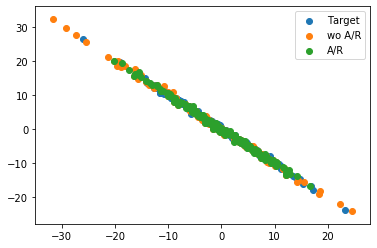

  4%|▍         | 200/5000 [01:06<26:09,  3.06it/s]

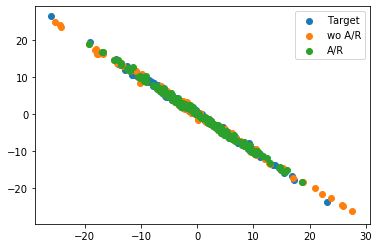

  4%|▍         | 201/5000 [01:06<28:34,  2.80it/s]

Step: 200 / 5000, Loss: -1.35e+02, Acceptance sample: 0.56, LR: 0.00100


  5%|▌         | 250/5000 [01:22<25:58,  3.05it/s]

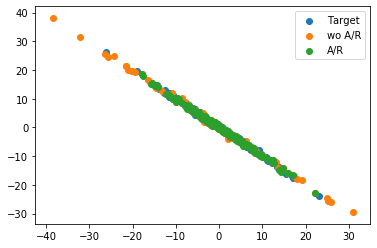

  6%|▌         | 300/5000 [01:39<25:47,  3.04it/s]

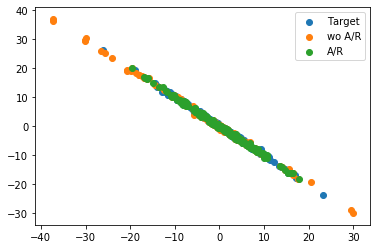

  6%|▌         | 301/5000 [01:39<28:08,  2.78it/s]

Step: 300 / 5000, Loss: -2.13e+02, Acceptance sample: 0.58, LR: 0.00100


  7%|▋         | 350/5000 [01:55<25:27,  3.04it/s]

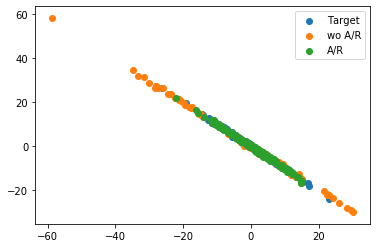

  8%|▊         | 400/5000 [02:12<24:53,  3.08it/s]

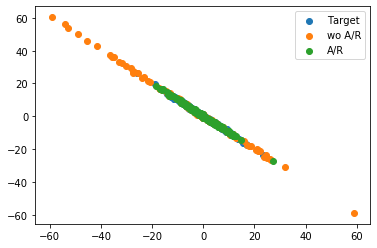

  8%|▊         | 401/5000 [02:12<27:18,  2.81it/s]

Step: 400 / 5000, Loss: -3.11e+02, Acceptance sample: 0.48, LR: 0.00100


  9%|▉         | 450/5000 [02:28<24:47,  3.06it/s]

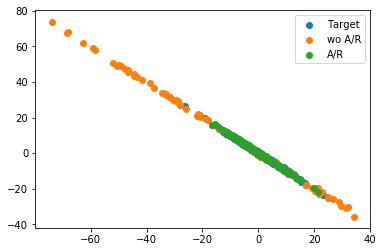

 10%|█         | 500/5000 [02:44<24:25,  3.07it/s]

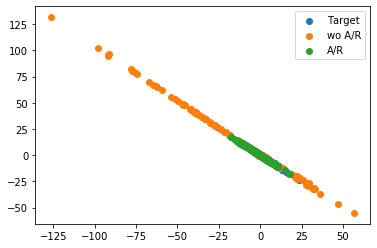

 10%|█         | 501/5000 [02:45<26:38,  2.81it/s]

Step: 500 / 5000, Loss: -1.15e+03, Acceptance sample: 0.19, LR: 0.00100


 11%|█         | 550/5000 [03:01<24:05,  3.08it/s]

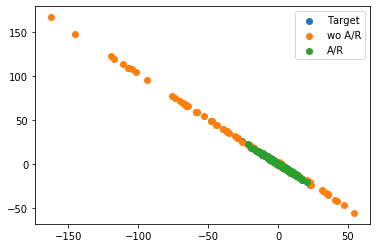

 12%|█▏        | 600/5000 [03:17<23:51,  3.07it/s]

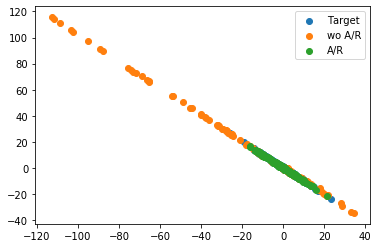

 12%|█▏        | 601/5000 [03:18<26:09,  2.80it/s]

Step: 600 / 5000, Loss: -1.71e+03, Acceptance sample: 0.26, LR: 0.00100


 13%|█▎        | 650/5000 [03:33<23:33,  3.08it/s]

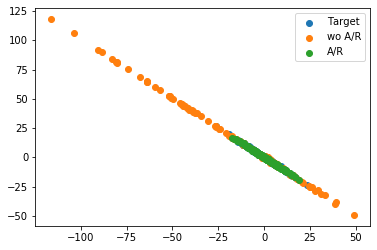

 14%|█▍        | 700/5000 [03:50<23:13,  3.09it/s]

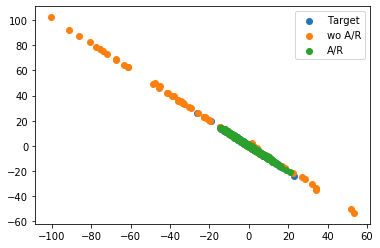

 14%|█▍        | 701/5000 [03:50<25:30,  2.81it/s]

Step: 700 / 5000, Loss: -2.25e+03, Acceptance sample: 0.34, LR: 0.00100


 15%|█▌        | 750/5000 [04:06<22:46,  3.11it/s]

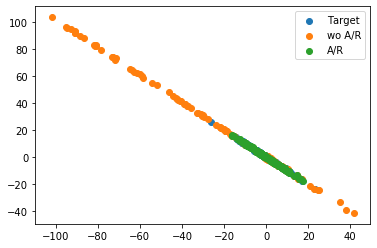

 16%|█▌        | 800/5000 [04:23<22:26,  3.12it/s]

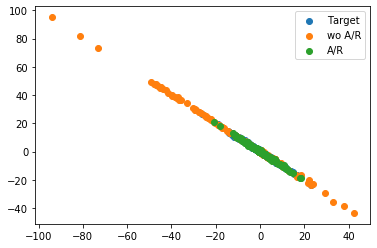

 16%|█▌        | 801/5000 [04:23<24:31,  2.85it/s]

Step: 800 / 5000, Loss: -2.38e+03, Acceptance sample: 0.34, LR: 0.00100


 17%|█▋        | 850/5000 [04:39<22:04,  3.13it/s]

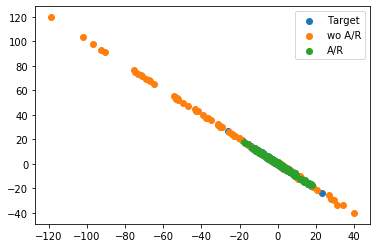

 18%|█▊        | 900/5000 [04:55<21:52,  3.12it/s]

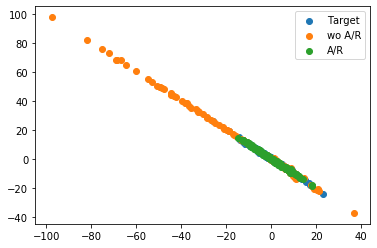

 18%|█▊        | 901/5000 [04:55<23:53,  2.86it/s]

Step: 900 / 5000, Loss: -2.85e+03, Acceptance sample: 0.34, LR: 0.00100


 19%|█▉        | 950/5000 [05:11<22:01,  3.07it/s]

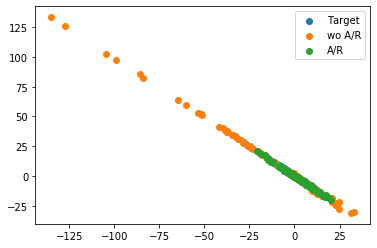

 20%|██        | 1000/5000 [05:28<21:49,  3.06it/s]

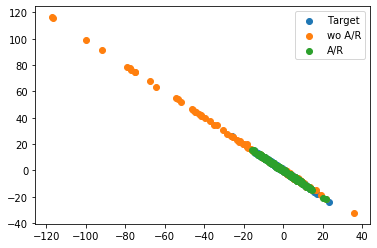

 20%|██        | 1001/5000 [05:28<23:52,  2.79it/s]

Step: 1000 / 5000, Loss: -2.83e+03, Acceptance sample: 0.40, LR: 0.00096


 21%|██        | 1050/5000 [05:44<21:27,  3.07it/s]

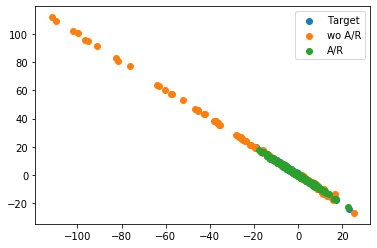

 22%|██▏       | 1100/5000 [06:01<20:47,  3.13it/s]

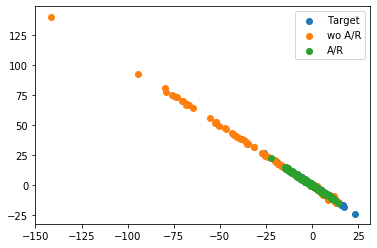

 22%|██▏       | 1101/5000 [06:01<23:18,  2.79it/s]

Step: 1100 / 5000, Loss: -2.81e+03, Acceptance sample: 0.31, LR: 0.00096


 23%|██▎       | 1150/5000 [06:17<20:31,  3.13it/s]

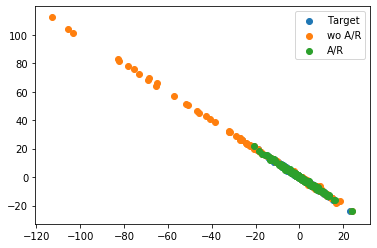

 24%|██▍       | 1200/5000 [06:33<20:11,  3.14it/s]

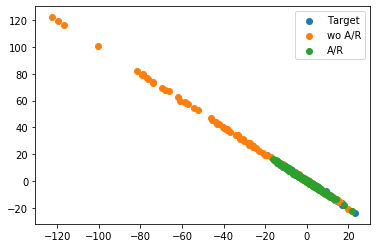

 24%|██▍       | 1201/5000 [06:33<22:03,  2.87it/s]

Step: 1200 / 5000, Loss: -3.35e+03, Acceptance sample: 0.33, LR: 0.00096


 25%|██▌       | 1250/5000 [06:49<20:14,  3.09it/s]

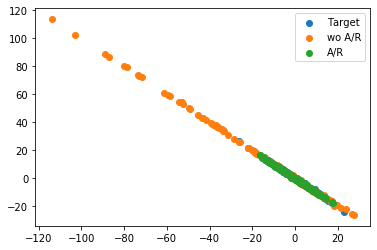

 26%|██▌       | 1300/5000 [07:05<20:16,  3.04it/s]

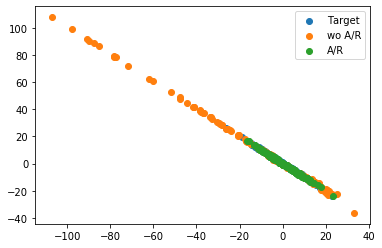

 26%|██▌       | 1301/5000 [07:06<22:00,  2.80it/s]

Step: 1300 / 5000, Loss: -3.55e+03, Acceptance sample: 0.23, LR: 0.00096


 27%|██▋       | 1350/5000 [07:22<20:08,  3.02it/s]

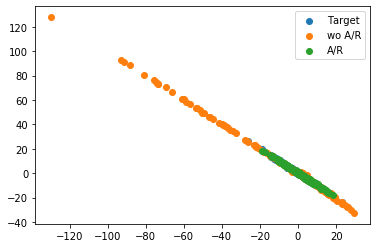

 28%|██▊       | 1400/5000 [07:39<19:39,  3.05it/s]

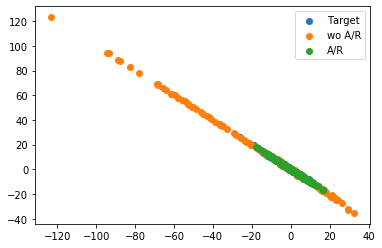

 28%|██▊       | 1401/5000 [07:39<21:28,  2.79it/s]

Step: 1400 / 5000, Loss: -5.11e+03, Acceptance sample: 0.35, LR: 0.00096


 29%|██▉       | 1450/5000 [07:55<19:31,  3.03it/s]

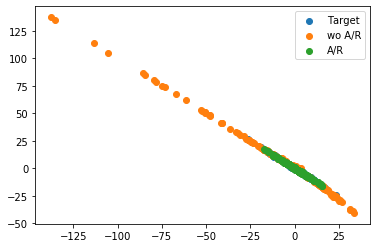

 30%|███       | 1500/5000 [08:12<19:13,  3.03it/s]

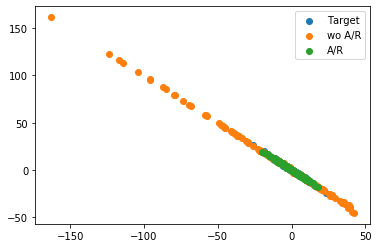

 30%|███       | 1501/5000 [08:12<21:05,  2.76it/s]

Step: 1500 / 5000, Loss: -4.08e+03, Acceptance sample: 0.25, LR: 0.00096


 31%|███       | 1550/5000 [08:28<18:47,  3.06it/s]

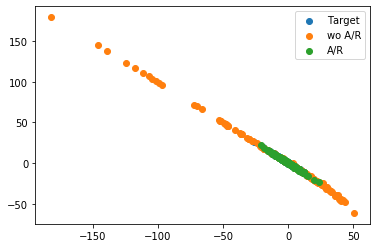

 32%|███▏      | 1600/5000 [08:45<18:43,  3.03it/s]

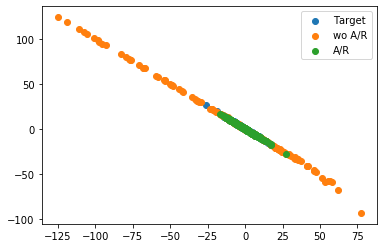

 32%|███▏      | 1601/5000 [08:45<20:20,  2.79it/s]

Step: 1600 / 5000, Loss: -5.52e+03, Acceptance sample: 0.31, LR: 0.00096


 33%|███▎      | 1650/5000 [09:01<18:17,  3.05it/s]

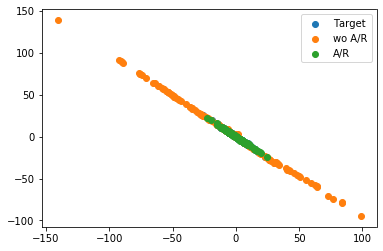

 34%|███▍      | 1700/5000 [09:18<18:00,  3.05it/s]

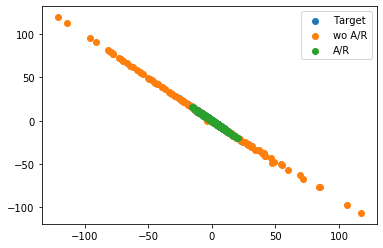

 34%|███▍      | 1701/5000 [09:18<19:30,  2.82it/s]

Step: 1700 / 5000, Loss: -5.62e+03, Acceptance sample: 0.29, LR: 0.00096


 35%|███▌      | 1750/5000 [09:34<17:44,  3.05it/s]

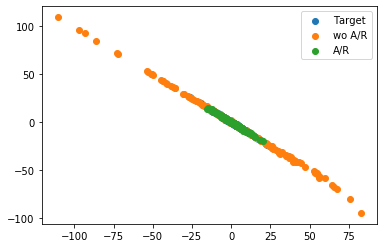

 36%|███▌      | 1800/5000 [09:51<17:30,  3.05it/s]

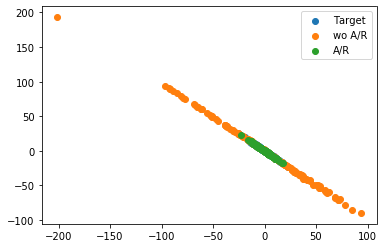

 36%|███▌      | 1801/5000 [09:51<19:04,  2.80it/s]

Step: 1800 / 5000, Loss: -5.54e+03, Acceptance sample: 0.28, LR: 0.00096


 37%|███▋      | 1850/5000 [10:07<17:09,  3.06it/s]

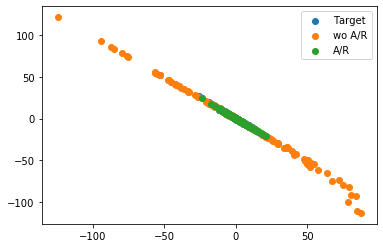

 38%|███▊      | 1900/5000 [10:24<16:54,  3.06it/s]

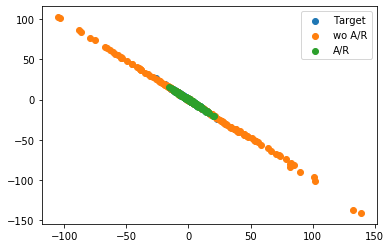

 38%|███▊      | 1901/5000 [10:24<18:20,  2.82it/s]

Step: 1900 / 5000, Loss: -5.35e+03, Acceptance sample: 0.27, LR: 0.00096


 39%|███▉      | 1950/5000 [10:40<16:21,  3.11it/s]

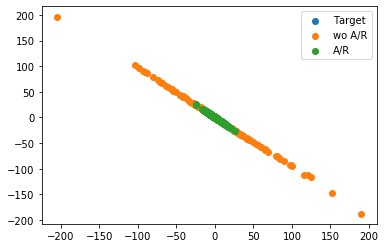

 40%|████      | 2000/5000 [10:56<16:05,  3.11it/s]

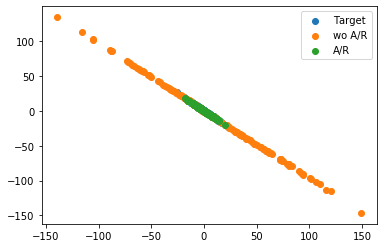

 40%|████      | 2001/5000 [10:57<17:28,  2.86it/s]

Step: 2000 / 5000, Loss: -6.00e+03, Acceptance sample: 0.26, LR: 0.00092


 41%|████      | 2050/5000 [11:13<15:48,  3.11it/s]

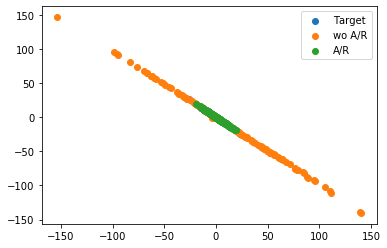

 42%|████▏     | 2100/5000 [11:29<15:28,  3.12it/s]

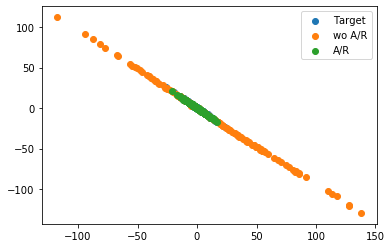

 42%|████▏     | 2101/5000 [11:29<16:47,  2.88it/s]

Step: 2100 / 5000, Loss: -6.00e+03, Acceptance sample: 0.26, LR: 0.00092


 43%|████▎     | 2150/5000 [11:45<15:23,  3.09it/s]

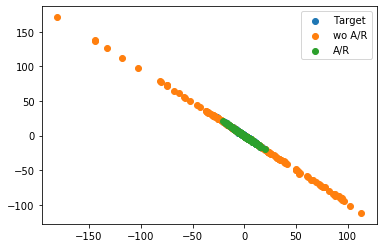

 44%|████▍     | 2200/5000 [12:01<14:58,  3.12it/s]

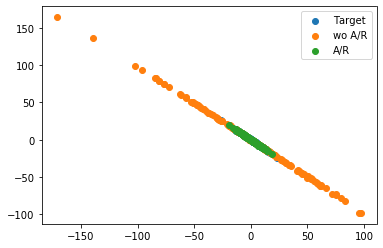

 44%|████▍     | 2201/5000 [12:02<16:40,  2.80it/s]

Step: 2200 / 5000, Loss: -5.25e+03, Acceptance sample: 0.25, LR: 0.00092


 45%|████▌     | 2250/5000 [12:18<15:12,  3.01it/s]

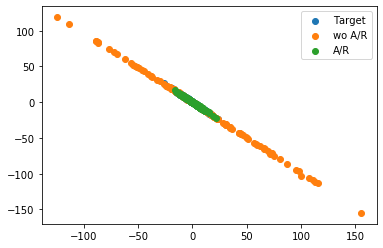

 46%|████▌     | 2300/5000 [12:35<14:37,  3.08it/s]

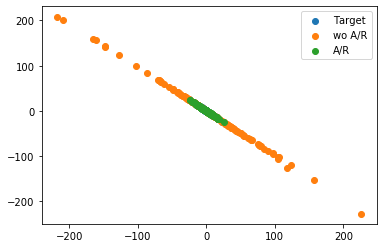

 46%|████▌     | 2301/5000 [12:35<15:51,  2.84it/s]

Step: 2300 / 5000, Loss: -6.00e+03, Acceptance sample: 0.18, LR: 0.00092


 47%|████▋     | 2350/5000 [12:51<14:20,  3.08it/s]

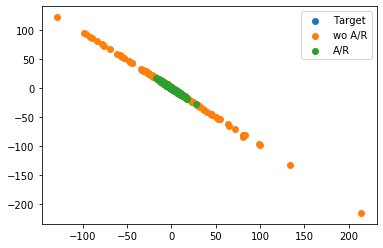

 48%|████▊     | 2400/5000 [13:07<14:09,  3.06it/s]

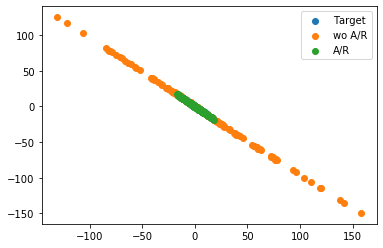

 48%|████▊     | 2401/5000 [13:08<15:20,  2.82it/s]

Step: 2400 / 5000, Loss: -6.56e+03, Acceptance sample: 0.23, LR: 0.00092


 49%|████▉     | 2450/5000 [13:24<13:56,  3.05it/s]

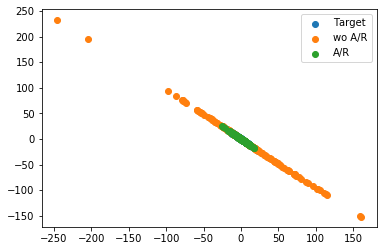

 50%|█████     | 2500/5000 [13:40<13:33,  3.07it/s]

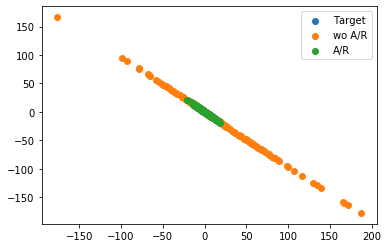

 50%|█████     | 2501/5000 [13:40<15:03,  2.77it/s]

Step: 2500 / 5000, Loss: -4.92e+03, Acceptance sample: 0.22, LR: 0.00092


 51%|█████     | 2550/5000 [13:57<13:21,  3.06it/s]

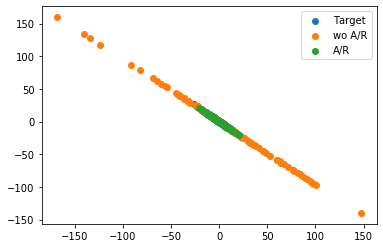

 52%|█████▏    | 2600/5000 [14:13<13:01,  3.07it/s]

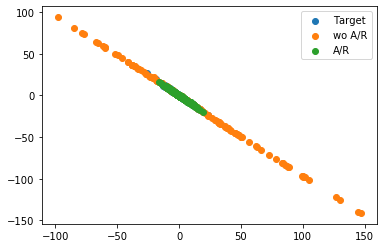

 52%|█████▏    | 2601/5000 [14:14<14:07,  2.83it/s]

Step: 2600 / 5000, Loss: -5.71e+03, Acceptance sample: 0.25, LR: 0.00092


 53%|█████▎    | 2650/5000 [14:29<12:35,  3.11it/s]

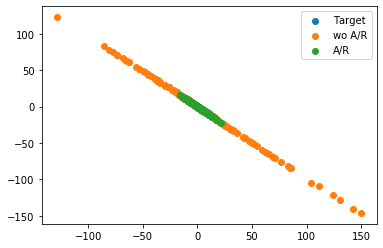

 54%|█████▍    | 2700/5000 [14:46<12:31,  3.06it/s]

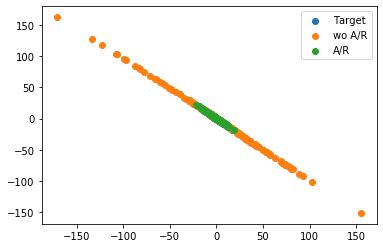

 54%|█████▍    | 2701/5000 [14:46<13:47,  2.78it/s]

Step: 2700 / 5000, Loss: -7.22e+03, Acceptance sample: 0.23, LR: 0.00092


 55%|█████▌    | 2750/5000 [15:02<12:01,  3.12it/s]

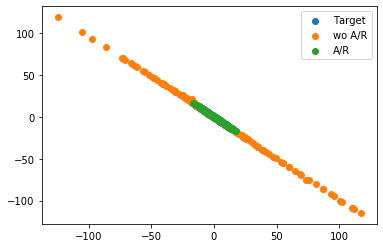

 56%|█████▌    | 2800/5000 [15:18<11:41,  3.14it/s]

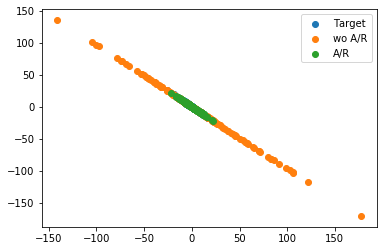

 56%|█████▌    | 2801/5000 [15:18<12:43,  2.88it/s]

Step: 2800 / 5000, Loss: -8.13e+03, Acceptance sample: 0.23, LR: 0.00092


 57%|█████▋    | 2850/5000 [15:34<11:26,  3.13it/s]

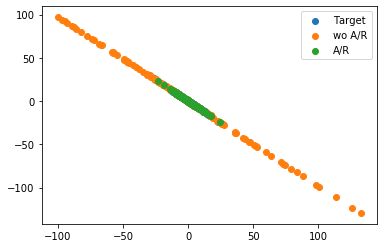

 58%|█████▊    | 2900/5000 [15:50<11:10,  3.13it/s]

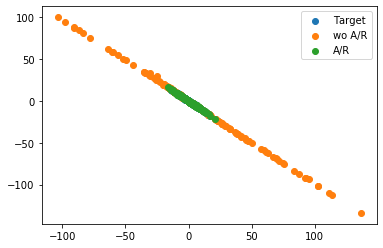

 58%|█████▊    | 2901/5000 [15:50<12:06,  2.89it/s]

Step: 2900 / 5000, Loss: -6.11e+03, Acceptance sample: 0.24, LR: 0.00092


 59%|█████▉    | 2950/5000 [16:06<10:56,  3.12it/s]

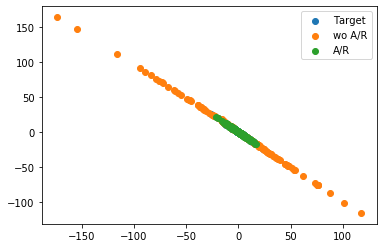

 60%|██████    | 3000/5000 [16:22<10:40,  3.12it/s]

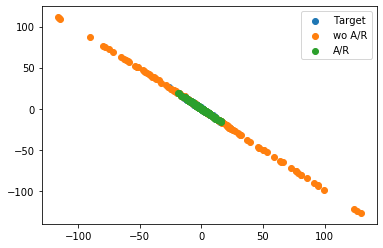

 60%|██████    | 3001/5000 [16:23<11:34,  2.88it/s]

Step: 3000 / 5000, Loss: -7.72e+03, Acceptance sample: 0.29, LR: 0.00088


 61%|██████    | 3050/5000 [16:38<10:37,  3.06it/s]

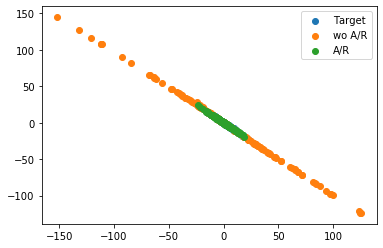

 62%|██████▏   | 3100/5000 [16:55<10:10,  3.11it/s]

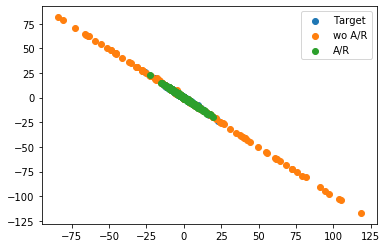

 62%|██████▏   | 3101/5000 [16:55<11:07,  2.84it/s]

Step: 3100 / 5000, Loss: -6.60e+03, Acceptance sample: 0.30, LR: 0.00088


 63%|██████▎   | 3150/5000 [17:11<09:56,  3.10it/s]

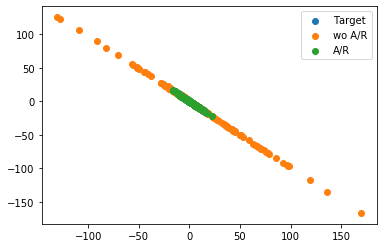

 64%|██████▍   | 3200/5000 [17:27<09:52,  3.04it/s]

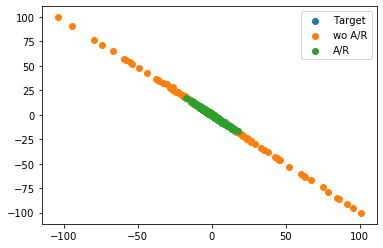

 64%|██████▍   | 3201/5000 [17:28<10:56,  2.74it/s]

Step: 3200 / 5000, Loss: -7.70e+03, Acceptance sample: 0.35, LR: 0.00088


 65%|██████▌   | 3250/5000 [17:44<09:35,  3.04it/s]

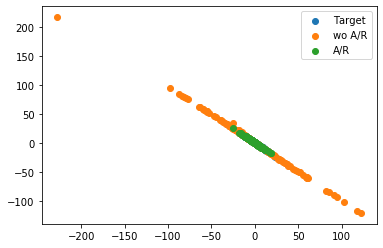

 66%|██████▌   | 3300/5000 [18:01<09:17,  3.05it/s]

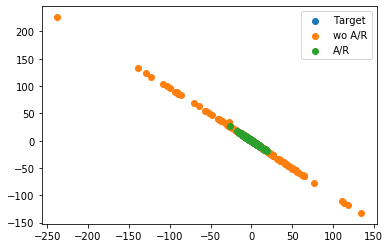

 66%|██████▌   | 3301/5000 [18:01<10:26,  2.71it/s]

Step: 3300 / 5000, Loss: -7.53e+03, Acceptance sample: 0.25, LR: 0.00088


 67%|██████▋   | 3350/5000 [18:17<09:03,  3.04it/s]

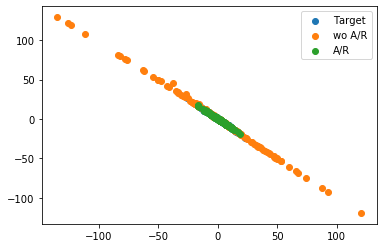

 68%|██████▊   | 3400/5000 [18:34<08:45,  3.05it/s]

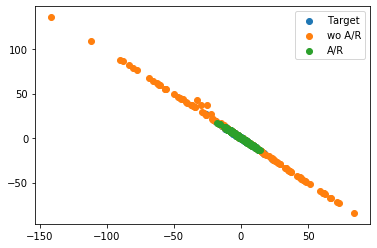

 68%|██████▊   | 3401/5000 [18:34<09:26,  2.82it/s]

Step: 3400 / 5000, Loss: -7.20e+03, Acceptance sample: 0.35, LR: 0.00088


 69%|██████▉   | 3450/5000 [18:50<08:25,  3.07it/s]

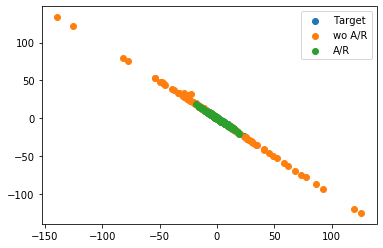

 70%|███████   | 3500/5000 [19:07<08:11,  3.05it/s]

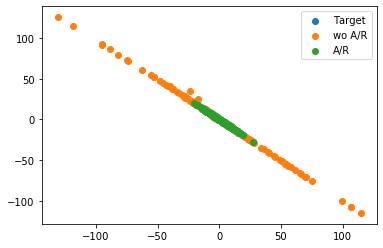

 70%|███████   | 3501/5000 [19:07<08:59,  2.78it/s]

Step: 3500 / 5000, Loss: -7.89e+03, Acceptance sample: 0.24, LR: 0.00088


 71%|███████   | 3550/5000 [19:23<07:44,  3.12it/s]

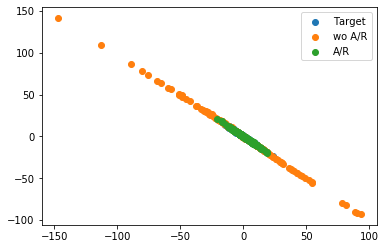

 72%|███████▏  | 3600/5000 [19:39<07:35,  3.07it/s]

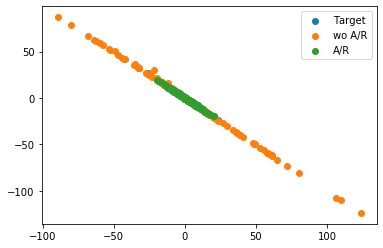

 72%|███████▏  | 3601/5000 [19:40<08:12,  2.84it/s]

Step: 3600 / 5000, Loss: -6.84e+03, Acceptance sample: 0.33, LR: 0.00088


 73%|███████▎  | 3650/5000 [19:56<07:26,  3.02it/s]

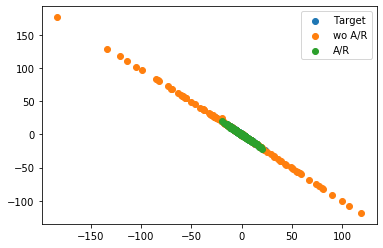

 74%|███████▍  | 3700/5000 [20:12<07:03,  3.07it/s]

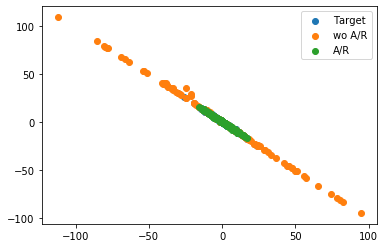

 74%|███████▍  | 3701/5000 [20:13<07:38,  2.83it/s]

Step: 3700 / 5000, Loss: -7.39e+03, Acceptance sample: 0.32, LR: 0.00088


 75%|███████▌  | 3750/5000 [20:29<06:47,  3.07it/s]

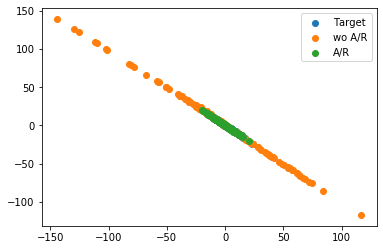

 76%|███████▌  | 3800/5000 [20:45<06:32,  3.06it/s]

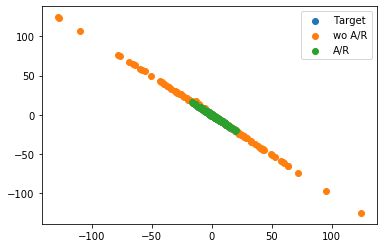

 76%|███████▌  | 3801/5000 [20:46<07:04,  2.83it/s]

Step: 3800 / 5000, Loss: -7.05e+03, Acceptance sample: 0.32, LR: 0.00088


 77%|███████▋  | 3850/5000 [21:02<06:17,  3.04it/s]

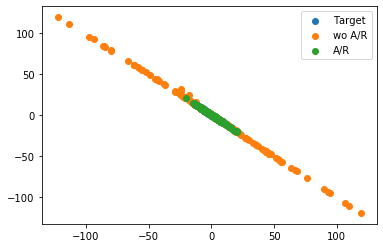

 78%|███████▊  | 3900/5000 [21:18<05:51,  3.13it/s]

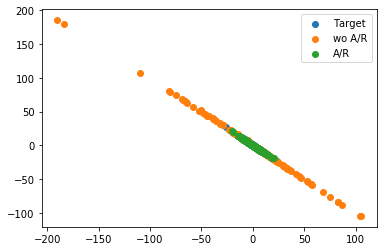

 78%|███████▊  | 3901/5000 [21:19<06:22,  2.87it/s]

Step: 3900 / 5000, Loss: -7.02e+03, Acceptance sample: 0.32, LR: 0.00088


 79%|███████▉  | 3950/5000 [21:34<05:41,  3.07it/s]

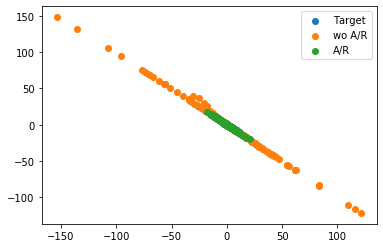

 80%|████████  | 4000/5000 [21:51<05:25,  3.07it/s]

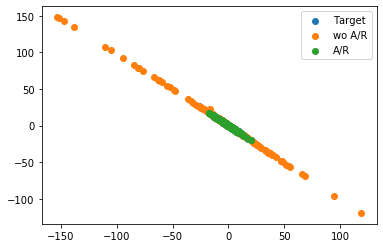

 80%|████████  | 4001/5000 [21:51<05:52,  2.83it/s]

Step: 4000 / 5000, Loss: -7.37e+03, Acceptance sample: 0.35, LR: 0.00085


 81%|████████  | 4050/5000 [22:07<05:10,  3.06it/s]

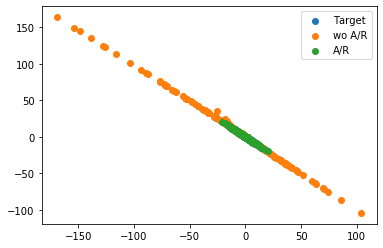

 82%|████████▏ | 4100/5000 [22:24<04:50,  3.10it/s]

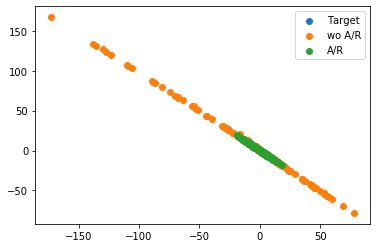

 82%|████████▏ | 4101/5000 [22:24<05:13,  2.87it/s]

Step: 4100 / 5000, Loss: -7.18e+03, Acceptance sample: 0.33, LR: 0.00085


 83%|████████▎ | 4150/5000 [22:40<04:37,  3.06it/s]

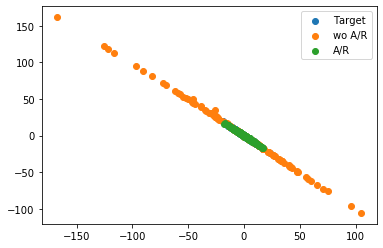

 84%|████████▍ | 4200/5000 [22:56<04:18,  3.09it/s]

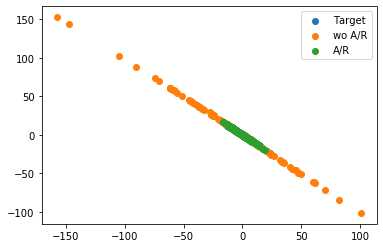

 84%|████████▍ | 4201/5000 [22:57<04:41,  2.83it/s]

Step: 4200 / 5000, Loss: -7.76e+03, Acceptance sample: 0.40, LR: 0.00085


 85%|████████▌ | 4250/5000 [23:13<04:06,  3.04it/s]

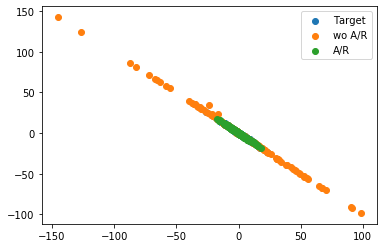

 86%|████████▌ | 4300/5000 [23:30<03:53,  3.00it/s]

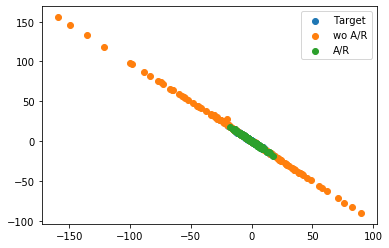

 86%|████████▌ | 4301/5000 [23:30<04:09,  2.80it/s]

Step: 4300 / 5000, Loss: -7.47e+03, Acceptance sample: 0.32, LR: 0.00085


 87%|████████▋ | 4350/5000 [23:46<03:31,  3.07it/s]

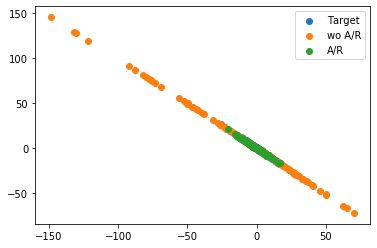

 88%|████████▊ | 4400/5000 [24:02<03:18,  3.03it/s]

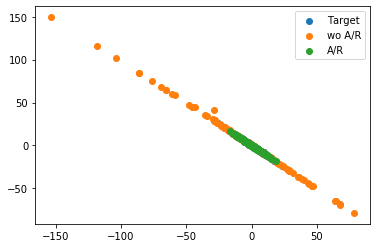

 88%|████████▊ | 4401/5000 [24:03<03:39,  2.73it/s]

Step: 4400 / 5000, Loss: -7.50e+03, Acceptance sample: 0.38, LR: 0.00085


 89%|████████▉ | 4450/5000 [24:19<02:57,  3.10it/s]

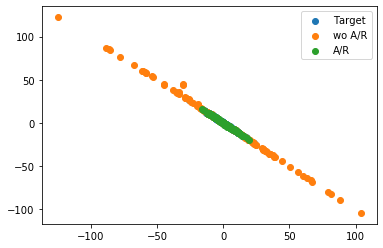

 90%|█████████ | 4500/5000 [24:35<02:44,  3.04it/s]

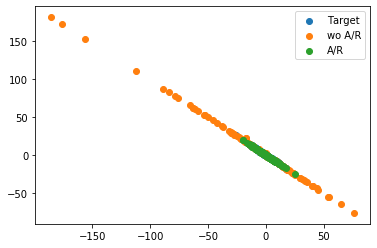

 90%|█████████ | 4501/5000 [24:36<03:00,  2.76it/s]

Step: 4500 / 5000, Loss: -7.63e+03, Acceptance sample: 0.40, LR: 0.00085


 91%|█████████ | 4550/5000 [24:52<02:28,  3.03it/s]

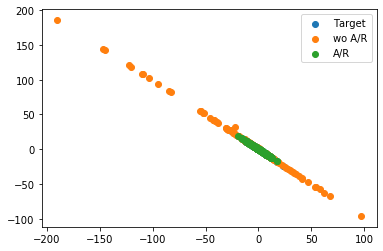

 92%|█████████▏| 4600/5000 [25:08<02:11,  3.04it/s]

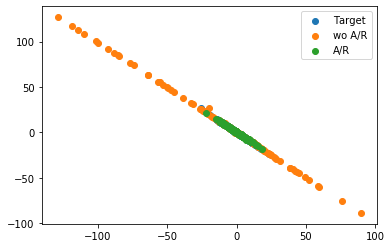

 92%|█████████▏| 4601/5000 [25:09<02:21,  2.81it/s]

Step: 4600 / 5000, Loss: -7.22e+03, Acceptance sample: 0.37, LR: 0.00085


 93%|█████████▎| 4650/5000 [25:25<01:52,  3.10it/s]

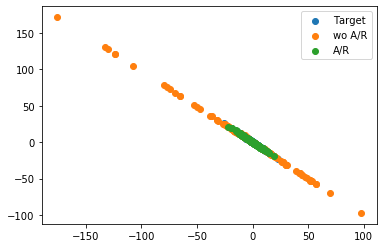

 94%|█████████▍| 4700/5000 [25:41<01:38,  3.06it/s]

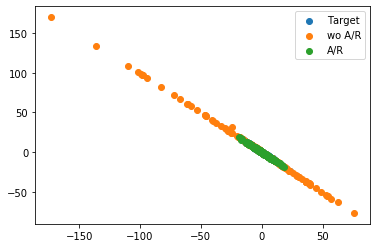

 94%|█████████▍| 4701/5000 [25:42<01:45,  2.83it/s]

Step: 4700 / 5000, Loss: -7.85e+03, Acceptance sample: 0.36, LR: 0.00085


 95%|█████████▌| 4750/5000 [25:58<01:21,  3.06it/s]

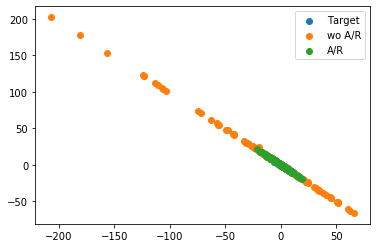

 96%|█████████▌| 4800/5000 [26:14<01:05,  3.05it/s]

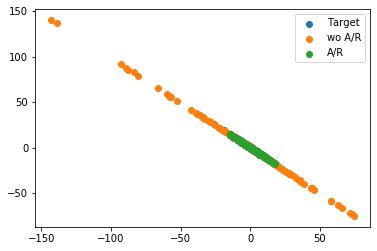

 96%|█████████▌| 4801/5000 [26:15<01:10,  2.82it/s]

Step: 4800 / 5000, Loss: -8.99e+03, Acceptance sample: 0.36, LR: 0.00085


 97%|█████████▋| 4850/5000 [26:31<00:48,  3.08it/s]

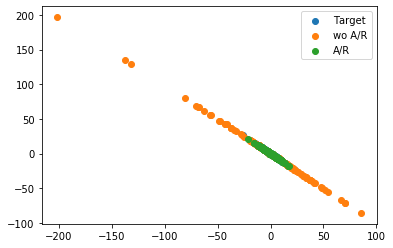

 98%|█████████▊| 4900/5000 [26:47<00:32,  3.05it/s]

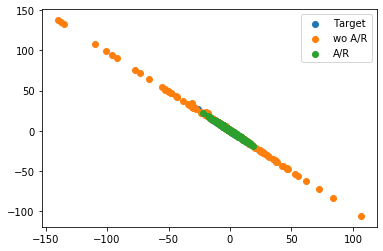

 98%|█████████▊| 4901/5000 [26:48<00:35,  2.77it/s]

Step: 4900 / 5000, Loss: -8.59e+03, Acceptance sample: 0.35, LR: 0.00085


 99%|█████████▉| 4950/5000 [27:04<00:16,  3.05it/s]

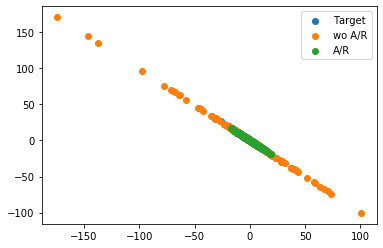

100%|██████████| 5000/5000 [27:20<00:00,  3.05it/s]


In [13]:
scheduler = StepLR(optim, step_size=1000, gamma=0.96)

def criterion(v1, v2):
    return scale * (torch.mean(1.0 / v1) + torch.mean(1.0 / v2)) + (-torch.mean(v1) - torch.mean(v2)) / scale

for t in tqdm(range(n_steps)):    
    if(t==0):
        x = torch.randn(n_samples, x_dim, dtype=torch.float32, device=device)
    else:
        x = output[0]

    z = torch.randn_like(x, dtype=torch.float32, device=device)

    optim.zero_grad()
    Lx, _, log_px, output, _, _ = propose(x, dynamics, do_mh_step=True, device=device, use_barker=use_barker)
    Lz, _, log_pz, _, _, _ = propose(z, dynamics, do_mh_step=False, device=device, use_barker=use_barker)
    
    if use_barker:
        px = log_px[0].exp()
        pz = log_pz[0].exp()
    else:
        px = log_px.exp()
        pz = log_pz.exp()
    

    v1 = (torch.sum((x - Lx)**2, dim=1) * px) + torch.tensor(1e-4, dtype=torch.float32, device=device)
    v2 = (torch.sum((z - Lz)**2, dim=1) * pz) + torch.tensor(1e-4, dtype=torch.float32, device=device)
    scale = torch.tensor(0.1, dtype=torch.float32, device=device)
    
    if t % 50 == 0:
        plt.scatter(S[:, 0], S[:, 1], label='Target')
        plt.scatter(Lx.cpu().detach()[:, 0], Lx.cpu().detach()[:, 1], label='wo A/R')
        plt.scatter(output[0].cpu().detach()[:, 0], output[0].cpu().detach()[:, 1], label='A/R')
        plt.legend()
        plt.show();

    loss = criterion(v1, v2)
    loss.backward()

    optim.step()
#     pdb.set_trace()

    if t % 100 == 0:
        current_lr = None
        for param_group in optim.param_groups:
            current_lr = param_group['lr']
        print ('Step: %d / %d, Loss: %.2e, Acceptance sample: %.2f, LR: %.5f' % (t, n_steps, loss.item(), np.mean(px.cpu().detach().numpy()), current_lr))
    scheduler.step()
    optim.zero_grad()

In [14]:
dynamics.alpha

Parameter containing:
tensor(0.0982, device='cuda:0', requires_grad=True)

In [15]:
length_of_chains = 400 #2000

In [16]:
samples = torch.tensor(distribution.get_samples(n=n_samples), dtype=torch.float32, device=device)
final_samples = []

samples_ = samples
with torch.no_grad():
#     pdb.set_trace()
    for t in tqdm(range(length_of_chains)):
        final_samples.append(samples_.cpu().numpy())
        _, _, _, samples_, _, _ = propose(samples_, dynamics, do_mh_step=True, device=device)
        samples_ = samples_[0].detach()

100%|██████████| 400/400 [00:29<00:00, 13.64it/s]


In [17]:
L2HMC_samples = np.array(final_samples)
with torch.no_grad():
    HMC_samples_1 = get_hmc_samples(2, 0.1, distribution.get_energy_function(), steps=length_of_chains, samples=samples, device=device)
    HMC_samples_2 = get_hmc_samples(2, 0.15, distribution.get_energy_function(), steps=length_of_chains, samples=samples, device=device)
    HMC_samples_3 = get_hmc_samples(2, 0.2, distribution.get_energy_function(), steps=length_of_chains, samples=samples, device=device)

100%|██████████| 400/400 [00:09<00:00, 40.12it/s]


In [18]:
L2HMC_samples.shape

(400, 200, 2)

In [19]:
HMC_samples_1.shape

(400, 200, 2)

In [20]:
# from func_utils_pt import acl_spectrum, ESS

In [21]:
scale = np.sqrt(np.trace(cov.cpu().detach().numpy()))
L2HMC = acl_spectrum(L2HMC_samples, scale=scale)
HMC1 = acl_spectrum(HMC_samples_1, scale=scale)
HMC2 = acl_spectrum(HMC_samples_2, scale=scale)
HMC3 = acl_spectrum(HMC_samples_3, scale=scale)

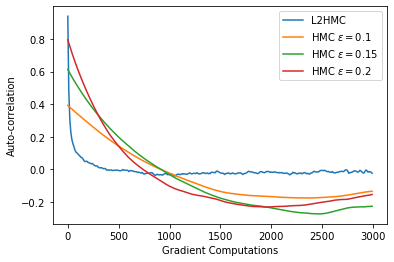

In [22]:
points_to_plot = np.min([300, length_of_chains - 1])
xaxis = 10 * np.arange(points_to_plot)
plt.plot(xaxis, L2HMC[:points_to_plot], label='L2HMC')
plt.plot(xaxis, HMC1[:points_to_plot], label='HMC $\epsilon=0.1$')
plt.plot(xaxis, HMC2[:points_to_plot], label='HMC $\epsilon=0.15$')
plt.plot(xaxis, HMC3[:points_to_plot], label='HMC $\epsilon=0.2$')
plt.ylabel('Auto-correlation')
plt.xlabel('Gradient Computations')
plt.legend()
plt.show()

In [23]:
# print('ESS L2HMC: %.2e -- ESS HMC: %.2e -- Ratio: %d' % (ESS(L2HMC), ESS(HMC2), ESS(L2HMC) / ESS(HMC2)))

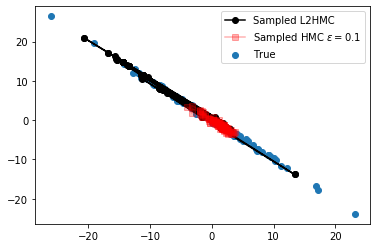

In [32]:
num = 7
points_to_plot = np.min([100, length_of_chains - 1])

plt.scatter(S[:points_to_plot, 0], S[:points_to_plot, 1], label='True')
plt.plot(L2HMC_samples[:points_to_plot, num, 0], L2HMC_samples[:points_to_plot, num, 1], label='Sampled L2HMC', color='black', marker='o')
plt.plot(HMC_samples_2[:points_to_plot, num, 0], HMC_samples_2[:points_to_plot, num, 1], label='Sampled HMC $\epsilon=0.1$', color='red', marker='s', alpha=0.3)
plt.legend()
plt.show()